# devise methods for having colormaps that serve specific needs

e.g. 

colors cold/hot with white in middle and unique ends, matching specific contour levels.

colors cold/hot with white at beginning or end.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

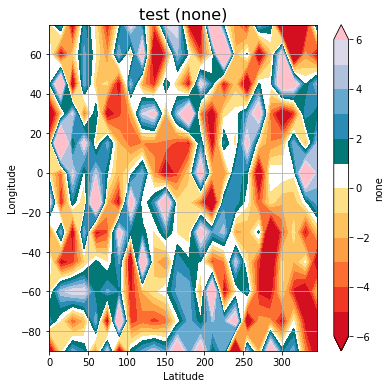

()

In [221]:
import numpy as np
import xarray as xr
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import inspect

from decadal_diag import \
  shade_2d_simple
  
__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

# a=mpl.pyplot.autumn()
# a.show()

data=xr.DataArray( np.random.normal(scale=5, size=(12,24)), coords=[('lat', np.arange(-90,90,15)), ('lon', np.arange(0,360,15))])

#https://matplotlib.org/1.3.0/api/colors_api.html
rgba_red=mpl.colors.ColorConverter.to_rgba('red')
rgba_cyan=mpl.colors.ColorConverter.to_rgba('cyan')
rgba_lawngreen=mpl.colors.ColorConverter.to_rgba('lawngreen')
rgba_yellow=mpl.colors.ColorConverter.to_rgba('yellow')
rgba_orange=mpl.colors.ColorConverter.to_rgba('orange')
rgba_royalblue=mpl.colors.ColorConverter.to_rgba('royalblue')

#print('j=',j)

#https://stackoverflow.com/questions/26108436/how-can-i-get-the-matplotlib-rgb-color-given-the-colormap-name-boundrynorm-an
# define the colormap
# cmap = plt.get_cmap('autumn_r')
# cmaplist = [cmap(i) for i in range(cmap.N)]
# cmaplist_new = [cmaplist[i] for i in [0, 50, 100, 150, 255]]

# cmap_YlOrRd = plt.get_cmap('YlOrRd')
# cmap_PuBuGn = plt.get_cmap('PuBuGn')

# cmaplist_YlOrRd = [cmap_YlOrRd(i) for i in range(cmap_YlOrRd.N)]
# cmaplist_PuBuGn = [cmap_PuBuGn(i) for i in range(cmap_PuBuGn.N)]

# # first=2
# # last=2

# zero_to_one = np.linspace(0, 1, 256)

# #print('zero_to_one.shape=',zero_to_one.shape)
# #print('zero_to_one=',zero_to_one)

# zero_to_255 = np.arange(256)

# #print('zero_to_255.shape=',zero_to_255.shape)
# #print('zero_to_255=',zero_to_255)

# select_YlOrRd=[0.2,.8,2] #from rull range start at index 0, end at 1, and create 2
# select_PuBuGn=[0.2,.8,2]

# deci_YlOrRd = np.linspace(select_YlOrRd[0], select_YlOrRd[1], select_YlOrRd[2])
# deci_PuBuGn = np.linspace(select_PuBuGn[0], select_PuBuGn[1], select_PuBuGn[2])

# indice_YlOrRd = []
# for deci_YlOrRd in deci_YlOrRds:
#   print('deci_YlOrRd=',deci_YlOrRd)
#   indice_YlOrRd.append(np.abs(zero_to_one - deci_YlOrRd).argmin())

# indice_PuBuGn = []
# for deci_PuBuGn in deci_PuBuGn:
#   print('deci_PuBuGn=',deci_PuBuGn)
#   indice_PuBuGn.append(np.abs(zero_to_one - deci_PuBuGn).argmin())
  
# print('indice_YlOrRd=',indice_YlOrRd)
# print('indice_PuBuGn=',indice_PuBuGn)

# #cmaplist_hero = [cmaplist_YlOrRd[i] for i in [50, 100]] + [(1.0, 1.0, 1.0, 1.0)] + [cmaplist_PuBuGn[i] for i in [50, 100]]
# cmaplist_hero = [cmaplist_YlOrRd[i] for i in indice_YlOrRd] + [(1.0, 1.0, 1.0, 1.0)] + [cmaplist_PuBuGn[i] for i in indice_PuBuGn]

# print('cmaplist_hero=',cmaplist_hero)

# #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

# print('cm.jet(0)=',cm.jet(0))
# print('cm.jet(254)=',cm.jet(254))
# print('cm.jet(255)=',cm.jet(255))

# #print('len(cm.jet)=',len(cm.jet))
# print('cm.jet=',cm.jet)

#print(data)

def cmap_hero(clevs, **kwargs):
  '''
  This is a convenient way of creating a new color map based in input contours levels (clevs).
  '''
  import inspect
  import numpy as np
  import matplotlib as mpl  
  
  Diag=False
  middle2white = first_middle2white = last_middle2white = False
  negative_infinity='.25'
  positive_infinity='.75'
  first_cmap='YlOrRd'
  last_cmap='PuBuGn'
  first_fraction=[0.,1.]
  last_fraction=[0.,1.]
  
  white_test=0
  if(middle2white): white_test+=1
  if(first_middle2white): white_test+=1
  if(last_middle2white): white_test+=1
    
  if(white_test>1): raise SystemExit('Need to have one or none of middle2white,first_middle2white,last_middle2white True.'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  for key, value in kwargs.items():
    if(key=='Diag'):
      Diag=value
    elif(key=='middle2white'):
      middle2white=bool(value)
    elif(key=='first_middle2white'):
      first_middle2white=bool(value)
    elif(key=='last_middle2white'):
      last_middle2white=bool(value)
    elif(key=='negative_infinity'):
      negative_infinity=value
    elif(key=='positive_infinity'):
      positive_infinity=value
    elif(key=='first_cmap'):
      first_cmap=value
    elif(key=='last_cmap'):
      last_cmap=value
    elif(key=='first_fraction'):
      first_fraction=value
    elif(key=='last_fraction'):
      last_fraction=value
    else:
      raise SystemExit('Dont know that key.'+__file__+' line number: '+str(inspect.stack()[0][2]))

  if(Diag==0): print('clevs=',clevs)

  positive_cnt=np.sum(np.array(clevs)>0)
  negative_cnt=np.sum(np.array(clevs)<0)
  zero_cnt=np.sum(np.array(clevs)==0)
  
  if(Diag==0): print('positive_cnt,zero_cnt,negative_cnt=',positive_cnt,zero_cnt,negative_cnt)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  cmap_first = plt.get_cmap(first_cmap)
  cmap_last = plt.get_cmap(last_cmap)

  cmaplist_first = [cmap_first(i) for i in range(cmap_first.N)]
  cmaplist_last = [cmap_last(i) for i in range(cmap_last.N)]

  zero_to_one = np.linspace(0, 1, 256)

  if(Diag>=1): print('zero_to_one.shape=',zero_to_one.shape)
  if(Diag>=1): print('zero_to_one=',zero_to_one)

  zero_to_255 = np.arange(255+1)

  if(Diag>=1): print('zero_to_255.shape=',zero_to_255.shape)
  if(Diag>=1): print('zero_to_255=',zero_to_255)

#this length 3 list corresponds to:
#element 0: fractional way through first color map to start (min 0)
#element 1: fractional way through first color map to end (max 1)
#element 2: number of points in
#this allows a segment of the full range of the color map to be linearyly extracted.
  if(middle2white):
    select_first = first_fraction + [negative_cnt-1]
    select_last = last_fraction + [positive_cnt-1]
    
  elif(first_middle2white):
    select_first = first_fraction + [negative_cnt-1]
    select_last = last_fraction + [positive_cnt]
    
  elif(last_middle2white):
    select_first = first_fraction + [negative_cnt]
    select_last = last_fraction + [positive_cnt-1]
    
  else:
    select_first = first_fraction + [negative_cnt]
    select_last = last_fraction + [positive_cnt]
    
  if(Diag==0): print('select_first=',select_first)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   select_first=[0.2, .8, 2]
#   select_last=[0.2, .8, 2]

  deci_firsts = np.linspace(select_first[0], select_first[1], select_first[2])
  deci_lasts = np.linspace(select_last[0], select_last[1], select_last[2])

  indice_first = []
  for deci_first in deci_firsts:
    if(Diag==0): print('deci_first=',deci_first)
    indice_first.append(np.abs(zero_to_one - deci_first).argmin())

  indice_last = []
  for deci_last in deci_lasts:
    if(Diag==0): print('deci_last=',deci_last)
    indice_last.append(np.abs(zero_to_one - deci_last).argmin())

  if(Diag==0): print('indice_first=',indice_first)
  if(Diag==0): print('indice_last=',indice_last)

  if(middle2white):
    cmaplist = [cmaplist_first[i] for i in indice_first] + [(1.0, 1.0, 1.0, 1.0)] + [(1.0, 1.0, 1.0, 1.0)] + [cmaplist_last[i] for i in indice_last]

  elif(first_middle2white):
    cmaplist = [cmaplist_first[i] for i in indice_first] + [(1.0, 1.0, 1.0, 1.0)] + [cmaplist_last[i] for i in indice_last]

  elif(last_middle2white):
    cmaplist = [cmaplist_first[i] for i in indice_first] + [(1.0, 1.0, 1.0, 1.0)] + [cmaplist_last[i] for i in indice_last]

  else:
    cmaplist = [cmaplist_first[i] for i in indice_first] + [cmaplist_last[i] for i in indice_last]
    
  if(Diag==0): print('cmaplist=',cmaplist)

  cmap = mpl.colors.ListedColormap(cmaplist)
  if(type(positive_infinity)!=type(None)):
    cmap.set_over(positive_infinity)
  if(type(negative_infinity)!=type(None)):
    cmap.set_under(negative_infinity)

  return(cmap) #end of cmap_hero

clevs=None
#step=5;clevs=sorted(list(set(np.arange(-15, 15+step, step).tolist())))
#step=2;clevs=sorted(list(set(np.arange(-6, 6+step, step).tolist())))
step=1;clevs=sorted(list(set(np.arange(-6, 6+step, step).tolist())))
#step=2;clevs=sorted(list(set(np.arange(-8, 8+step, step).tolist())))
#step=2;clevs=sorted(list(set(np.arange(-8, 6+step, step).tolist())))
#step=2;clevs=sorted(list(set(np.arange(-6, 8+step, step).tolist())))

#clevs=[-6, -2, 0, 2, 5]

cmap = cmap_hero(clevs, \
                  Diag=-1, \
#                   middle2white=True, \
#                   first_middle2white=True, \
                  last_middle2white=True, \
                  negative_infinity=None, \
                  positive_infinity='pink', \
                  first_cmap='YlOrRd_r', \
                  first_fraction=[.2,.8], \
                  last_cmap='PuBuGn_r', \
                  last_fraction=[.2,.8])

#print('cmap=',cmap)
#cmap='rainbow'
#cmap = mpl.colors.ListedColormap(['cyan', 'lawngreen', 'yellow', 'orange', 'royalblue'])
#cmap = mpl.colors.ListedColormap([rgba_cyan, rgba_lawngreen, rgba_yellow, rgba_orange, rgba_royalblue])
#cmap = mpl.colors.ListedColormap(cmaplist)
#cmap = mpl.colors.ListedColormap(cmaplist_new)
#cmap = 'autumn_r'
# cmap = mpl.colors.ListedColormap(cmaplist_hero)
# cmap.set_over('.25')
# cmap.set_under('.75')

shade_2d_simple(data, \
      title='test', \
      units='none', \
      xyvals=(data['lon'], data['lat']), \
      xysize=(6,6), \
      xlab='Latitude', \
      ylab='Longitude', \
      grid=True, \
      clevs=clevs, \
      cmap=cmap \
      )

normlist= [-1, 0, 1, 1, 2]
j= [0, 1, 2, 4, 7, 8, 13]
normlist= [2, 4, 4, 4, 4]
j= [-10, -1.0, -0.5, 0.0, 0.5, 1.0, 10]


/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


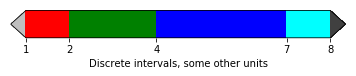

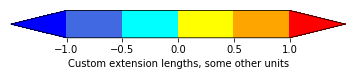

In [76]:
#https://matplotlib.org/tutorials/colors/colorbar_only.html

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [1, 2, 4, 7, 8] #orig
bounds = [1, 2, 4, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

normlist = [norm(i) for i in range(norm.N)]

print('normlist=',normlist)

cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
#                                 boundaries=[0] + bounds + [13], #orig
                                boundaries=[0] + bounds + [9],
                                extend='both',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Discrete intervals, some other units')
fig.show()

j=[0] + bounds + [13]

print('j=',j)

#############
  
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(['royalblue', 'cyan', 'yellow', 'orange'])
cmap.set_over('red')
cmap.set_under('blue')

bounds = [-1.0, -0.5, 0.0, 0.5, 1.0]
#https://matplotlib.org/api/_as_gen/matplotlib.colors.BoundaryNorm.html
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

normlist = [norm(i) for i in range(norm.N)]

print('normlist=',normlist)

cb3 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
#                                 boundaries=[-10] + bounds + [10],
                                boundaries=[-9999] + bounds + [10],
                                extend='both',
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb3.set_label('Custom extension lengths, some other units')
fig.show()

j=[-10] + bounds + [10]

print('j=',j)

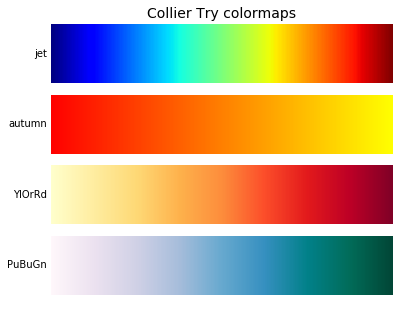

In [106]:
#import numpy as np
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

# cmaps['Miscellaneous'] = [ \
#             'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', \
#             'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', \
#             'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

cmaps['Collier Try'] = [ \
            'jet','autumn','YlOrRd','PuBuGn']

nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()